In [1]:
pip install -U keras-tuner

     |████████████████████████████████| 61kB 3.5MB/s 
  Created wheel for keras-tuner: filename=keras_tuner-1.0.1-cp36-none-any.whl size=73200 sha256=395d213972c517ee2516f9480d3d03344b8543957dc8e941afb8d63854c3f4e3
  Stored in directory: /root/.cache/pip/wheels/b9/cc/62/52716b70dd90f3db12519233c3a93a5360bc672da1a10ded43
  Created wheel for terminaltables: filename=terminaltables-3.1.0-cp36-none-any.whl size=15356 sha256=450c5e3d9d2a0caef46beea52a689c89a4e79b10e2a5526f511ecae2d38b5490
  Stored in directory: /root/.cache/pip/wheels/30/6b/50/6c75775b681fb36cdfac7f19799888ef9d8813aff9e379663e
Successfully built keras-tuner terminaltables


In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout,BatchNormalization,LSTM,Conv1D,MaxPooling1D
from kerastuner import RandomSearch 
from kerastuner.engine.hyperparameters import HyperParameters
import time
from tensorflow.keras.layers import Flatten
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.preprocessing import StandardScaler
from keras import regularizers, optimizers

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


In [0]:
# Importing tensorflow
np.random.seed(42)
import tensorflow as tf
tf.random.set_seed(42)

In [4]:
print(tf.__version__)

2.2.0-rc3


**Load Data**

In [5]:
cd /content/drive/My Drive/HumanActivityRecognition.zip (Unzipped Files)

/content/drive/My Drive/HumanActivityRecognition.zip (Unzipped Files)


In [0]:
# Data directory
DATADIR = 'UCI_HAR_Dataset'

In [0]:
def data():
    ''' This function is to load the data'''
    SIGNALS = ["body_acc_x","body_acc_y","body_acc_z","body_gyro_x","body_gyro_y","body_gyro_z","total_acc_x","total_acc_y","total_acc_z"]
    signals_data = []
    for signal in SIGNALS:
        filename = f'/content/drive/My Drive/HumanActivityRecognition.zip (Unzipped Files)/HAR/UCI_HAR_Dataset/train/Inertial Signals/{signal}_train.txt'
        signals_data.append(pd.read_csv(filename, delim_whitespace=True, header=None).values) 
    X_train = np.transpose(signals_data, (1, 2, 0)) 
    
    signals_data = []
    for signal in SIGNALS:
        filename = f'/content/drive/My Drive/HumanActivityRecognition.zip (Unzipped Files)/HAR/UCI_HAR_Dataset/test/Inertial Signals/{signal}_test.txt'
        signals_data.append(
            pd.read_csv(filename, delim_whitespace=True, header=None).values ) 
    X_test = np.transpose(signals_data, (1, 2, 0))
    
    filename = f'/content/drive/My Drive/HumanActivityRecognition.zip (Unzipped Files)/HAR/UCI_HAR_Dataset/train/y_train.txt'
    y = pd.read_csv(filename, delim_whitespace=True, header=None)[0]
    Y_train = pd.get_dummies(y).values
    
    filename = f'/content/drive/My Drive/HumanActivityRecognition.zip (Unzipped Files)/HAR/UCI_HAR_Dataset/test/y_test.txt'
    y = pd.read_csv(filename, delim_whitespace=True, header=None)[0]
    Y_test = pd.get_dummies(y).values 
    
    return X_train , Y_train , X_test , Y_test

In [0]:
# Loading the train and test data
X_train_full, Y_train_full,X_test_full, Y_test_full = data()

In [9]:
timesteps = len(X_train_full[0])
input_dim = len(X_train_full[0][0])
n_classes = 6

print(timesteps)
print(input_dim)
print(len(X_train_full))

128
9
7352


In [0]:
'''def best_hyperparameters(hp):
  model = Sequential()

  model.add(LSTM(units=hp.Int('units',min_value=95,max_value=130,step=5),input_shape=(timesteps, input_dim),return_sequences=True)) 
  
  model.add(BatchNormalization()) 

  model.add(Dropout(0.7)) 

  model.add(LSTM(50))
  
  model.add(Dropout(0.70))
  #model.add(BatchNormalization()) 

  # model.add(Dropout(hp.Float('dropout',min_value=0.1,max_value=0.9,step=0.1))) 

  model.add(Flatten())
  
  model.add(Dense(n_classes, activation='sigmoid'))

  model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-1,1e-2,1e-3,1e-4,1e-5])),loss='categorical_crossentropy',metrics=['accuracy']) 

  return model'''

"def best_hyperparameters(hp):\n  model = Sequential()\n\n  model.add(LSTM(units=hp.Int('units',min_value=95,max_value=130,step=5),input_shape=(timesteps, input_dim),return_sequences=True)) \n  \n  model.add(BatchNormalization()) \n\n  model.add(Dropout(0.7)) \n\n  model.add(LSTM(50))\n  \n  model.add(Dropout(0.70))\n  #model.add(BatchNormalization()) \n\n  # model.add(Dropout(hp.Float('dropout',min_value=0.1,max_value=0.9,step=0.1))) \n\n  model.add(Flatten())\n  \n  model.add(Dense(n_classes, activation='sigmoid'))\n\n  model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-1,1e-2,1e-3,1e-4,1e-5])),loss='categorical_crossentropy',metrics=['accuracy']) \n\n  return model"

In [0]:
# tuner_search=RandomSearch(best_hyperparameters,objective='val_accuracy',max_trials=5,directory='out_put',project_name="Human activity")  

In [0]:
# tuner_search.search(X_train,Y_train,epochs=15,batch_size =32,validation_split=0.2)  

In [0]:
from keras.regularizers import L1L2
reg = L1L2(0.01, 0.01)
model = Sequential()
model.add(LSTM(100, input_shape=(timesteps, input_dim), kernel_initializer='glorot_normal' , return_sequences=True, bias_regularizer=reg))
model.add(BatchNormalization())
model.add(Dropout(0.70))
model.add(LSTM(50))
model.add(Dropout(0.70))
model.add(Dense(n_classes, activation='sigmoid'))
print("Model Summary: ")
model.summary()

Model Summary: 
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 128, 100)          44000     
_________________________________________________________________
batch_normalization (BatchNo (None, 128, 100)          400       
_________________________________________________________________
dropout (Dropout)            (None, 128, 100)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 50)                30200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense (Dense)                (None, 6)                 306       
Total params: 74,906
Trainable params: 74,706
Non-trainable params: 200
__________________________________

In [0]:
# Compiling the model
model.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [0]:
# Training the model
model.fit(X_train_full,Y_train_full,batch_size=16,validation_data=(X_test_full, Y_test_full),epochs=50,verbose=1)

Epoch 1/50
460/460 [==============================] - 32s 69ms/step - loss: 1.7053 - accuracy: 0.5660 - val_loss: 1.0362 - val_accuracy: 0.7004
Epoch 2/50
460/460 [==============================] - 31s 67ms/step - loss: 0.6516 - accuracy: 0.7482 - val_loss: 0.2428 - val_accuracy: 0.8734
Epoch 3/50
460/460 [==============================] - 31s 67ms/step - loss: 0.1678 - accuracy: 0.8796 - val_loss: 0.0876 - val_accuracy: 0.8989
Epoch 4/50
460/460 [==============================] - 31s 67ms/step - loss: 0.1177 - accuracy: 0.9189 - val_loss: 0.1405 - val_accuracy: 0.8643
Epoch 5/50
460/460 [==============================] - 31s 67ms/step - loss: 0.1071 - accuracy: 0.9242 - val_loss: 0.0993 - val_accuracy: 0.8985
Epoch 6/50
460/460 [==============================] - 31s 67ms/step - loss: 0.0943 - accuracy: 0.9327 - val_loss: 0.0793 - val_accuracy: 0.9155
Epoch 7/50
460/460 [==============================] - 31s 68ms/step - loss: 0.0914 - accuracy: 0.9312 - val_loss: 0.1342 - val_accuracy:

In [0]:
print()
scores = model.evaluate(X_test_full, Y_test_full, verbose=0)
print("Test Accuracy: %f%%" % (scores[1]*100))
print()


Test Accuracy: 91.754329%



In [0]:
def plot_confusion_matrix_lstm(y_test, y_predict):
    result = confusion_matrix(y_test, y_predict)

    plt.figure(figsize=(12, 10))
    sns.heatmap(result, 
                xticklabels= list(ACTIVITIES.values()), 
                yticklabels=list(ACTIVITIES.values()), 
                annot=True, fmt="d");
    plt.title("Confusion matrix")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show() 

In [0]:
# Activities are the class labels
# It is a 6 class classification
ACTIVITIES = {0: 'WALKING',1: 'WALKING_UPSTAIRS',2: 'WALKING_DOWNSTAIRS',3: 'SITTING',4: 'STANDING',5: 'LAYING'}

# Utility function to print the confusion matrix
def confusion_matrix(Y_true, Y_pred):
    Y_true = pd.Series([ACTIVITIES[y] for y in np.argmax(Y_true, axis=1)])
    Y_pred = pd.Series([ACTIVITIES[y] for y in np.argmax(Y_pred, axis=1)])

    return pd.crosstab(Y_true, Y_pred, rownames=['True'], colnames=['Pred'])
# Confusion Matrix
confusion_matrix(Y_test_full, model.predict(X_test_full)) 

Pred,LAYING,SITTING,STANDING,WALKING,WALKING_DOWNSTAIRS,WALKING_UPSTAIRS
True,,,,,,
LAYING,537,0,0,0,0,0
SITTING,0,382,107,0,0,2
STANDING,0,85,447,0,0,0
WALKING,0,0,1,464,28,3
WALKING_DOWNSTAIRS,0,0,0,0,415,5
WALKING_UPSTAIRS,0,3,0,1,8,459


**Divide and Conquer**

In [0]:
def data_train():
    ''' This function is to load the data'''
    SIGNALS = ["body_acc_x","body_acc_y","body_acc_z","body_gyro_x","body_gyro_y","body_gyro_z","total_acc_x","total_acc_y","total_acc_z"]
    signals_data = []
    for signal in SIGNALS:
        filename = f'/content/drive/My Drive/HumanActivityRecognition.zip (Unzipped Files)/HAR/UCI_HAR_Dataset/train/Inertial Signals/{signal}_train.txt'
        signals_data.append(pd.read_csv(filename, delim_whitespace=True, header=None).values) 
    X_train = np.transpose(signals_data, (1, 2, 0)) 
    
    return X_train

def data_test():
    ''' This function is to load the data'''
    SIGNALS = ["body_acc_x","body_acc_y","body_acc_z","body_gyro_x","body_gyro_y","body_gyro_z","total_acc_x","total_acc_y","total_acc_z"]
    signals_data = []
    for signal in SIGNALS:
        filename = f'/content/drive/My Drive/HumanActivityRecognition.zip (Unzipped Files)/HAR/UCI_HAR_Dataset/test/Inertial Signals/{signal}_test.txt'
        signals_data.append(pd.read_csv(filename, delim_whitespace=True, header=None).values) 
    X_test = np.transpose(signals_data, (1, 2, 0))

    return X_test
    

In [0]:

def load_y_static_dynamic(subset):
  filename = f'/content/drive/My Drive/HumanActivityRecognition.zip (Unzipped Files)/HAR/UCI_HAR_Dataset/{subset}/y_{subset}.txt'
  y = pd.read_csv(filename, delim_whitespace=True, header=None)[0]
  Y_train = pd.get_dummies(y).values
  y[y<=3] = 0 # Dynamic activities
  y[y>3] = 1  # Static activities
  return pd.get_dummies(y).values

In [0]:
def load_data():
    """
    Obtain the dataset from multiple files.
    Returns: X_train, X_test, y_train, y_test
    """
    X_train, X_test = data_train(), data_test()
    y_train, y_test = load_y_static_dynamic('train'), load_y_static_dynamic('test')

    return X_train, X_test, y_train, y_test

In [13]:
x_train, x_test, y_train, y_test = load_data()
x_train.shape, x_test.shape, y_train.shape, y_test.shape 

((7352, 128, 9), (2947, 128, 9), (7352, 2), (2947, 2))

In [14]:
timesteps = len(x_train[0])
input_dim = len(x_train[0][0])

print(timesteps)
print(input_dim)
print(len(x_train)) 

128
9
7352


In [15]:
model1= Sequential() 
model1.add(Conv1D(filters= 32, kernel_size= 3, activation= 'relu', kernel_initializer= 'he_normal',kernel_regularizer = regularizers.l2(0.1), input_shape=(timesteps, input_dim)))
model1.add(Dropout(0.5))
model1.add(MaxPooling1D(pool_size= 2))
model1.add(Flatten())
model1.add(Dense(units= 2, activation= 'softmax')) 
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 126, 32)           896       
_________________________________________________________________
dropout (Dropout)            (None, 126, 32)           0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 63, 32)            0         
_________________________________________________________________
flatten (Flatten)            (None, 2016)              0         
_________________________________________________________________
dense (Dense)                (None, 2)                 4034      
Total params: 4,930
Trainable params: 4,930
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Compiling the model
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [17]:
# Initializing parameters
epochs = 10
batch_size = 16
# Training the model 
history1= model1.fit(x_train, y_train, batch_size=batch_size, validation_data=(x_test, y_test), epochs=epochs)

Epoch 1/10
460/460 [==============================] - 3s 5ms/step - loss: 2.4361 - accuracy: 0.9744 - val_loss: 0.5410 - val_accuracy: 0.9854
Epoch 2/10
460/460 [==============================] - 2s 5ms/step - loss: 0.1865 - accuracy: 0.9977 - val_loss: 0.1080 - val_accuracy: 0.9949
Epoch 3/10
460/460 [==============================] - 2s 5ms/step - loss: 0.0502 - accuracy: 0.9977 - val_loss: 0.0714 - val_accuracy: 0.9959
Epoch 4/10
460/460 [==============================] - 2s 5ms/step - loss: 0.0376 - accuracy: 0.9980 - val_loss: 0.0709 - val_accuracy: 0.9908
Epoch 5/10
460/460 [==============================] - 2s 5ms/step - loss: 0.0320 - accuracy: 0.9980 - val_loss: 0.0527 - val_accuracy: 0.9966
Epoch 6/10
460/460 [==============================] - 2s 5ms/step - loss: 0.0264 - accuracy: 0.9992 - val_loss: 0.0491 - val_accuracy: 0.9946
Epoch 7/10
460/460 [==============================] - 2s 5ms/step - loss: 0.0249 - accuracy: 0.9982 - val_loss: 0.0415 - val_accuracy: 0.9969
Epoch 

In [18]:
score1 = model1.evaluate(x_test, y_test)

93/93 [==============================] - 0s 3ms/step - loss: 0.0306 - accuracy: 0.9973


In [0]:
def plt_dynamic(x, vy, ty, ax, color = 'b'):
    ax.plot(x, vy, 'b', label = 'Validation Loss')
    ax.plot(x, vy, 'b', label = 'Validation Loss')
    ax.plot(x, ty, 'r', label = 'Train Loss')
    plt.grid()
    plt.legend()
    fig.canvas.draw()

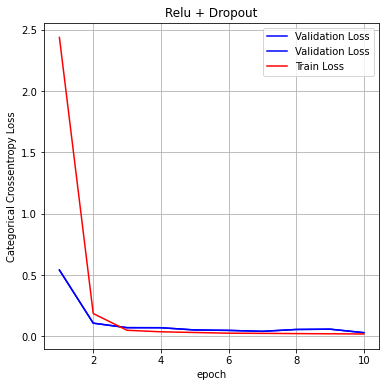

In [20]:
fig, ax = plt.subplots(1,1, figsize = (6, 6))
ax.set_xlabel('epoch')
ax.set_ylabel('Categorical Crossentropy Loss')
plt.title('Relu + Dropout')

# list of epoch numbers: epoch = 10
x = list(range(1,10+1))
vy = history1.history['val_loss']
ty = history1.history['loss']
plt_dynamic(x, vy, ty, ax) 

In [21]:
import pickle
model1.save('model1')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: model1/assets


**Static Activities**

In [0]:
def data_load(subset):
    ''' This function is to load the data'''
    SIGNALS = ["body_acc_x","body_acc_y","body_acc_z","body_gyro_x","body_gyro_y","body_gyro_z","total_acc_x","total_acc_y","total_acc_z"]
    signals_data = []
    for signal in SIGNALS:
        filename = f'/content/drive/My Drive/HumanActivityRecognition.zip (Unzipped Files)/HAR/UCI_HAR_Dataset/{subset}/Inertial Signals/{signal}_{subset}.txt'
        signals_data.append(pd.read_csv(filename, delim_whitespace=True, header=None).values) 
    data = np.transpose(signals_data, (1, 2, 0)) 
    return data 

In [0]:
# Labelling the classes in 'y' after OHE

label = {0:'SITTING', 1:'STANDING', 2:'LAYING'}

def load_y_static(subset):
  filename = f'/content/drive/My Drive/HumanActivityRecognition.zip (Unzipped Files)/HAR/UCI_HAR_Dataset/{subset}/y_{subset}.txt'
  y = pd.read_csv(filename, delim_whitespace=True, header=None)[0]
  y_subset = y>3
  y = y[y_subset] 
  return pd.get_dummies(y).values,y_subset 

In [0]:
def load_data():
    """
    Obtain the dataset from multiple files.
    Returns: X_train, X_test, y_train, y_test
    """
    X_train, X_test = data_load('train'), data_load('test')
    y_train, y_train1 = load_y_static('train')
    y_test, y_test1 =  load_y_static('test')

    X_train = X_train[y_train1]

    X_test = X_test[y_test1]
    
    return X_train, X_test, y_train, y_test 

In [25]:
# Loading the train and test data
X_train, X_test, Y_train, Y_test = load_data()

print('X_train shape is: ',X_train.shape)
print('Y_train shape is: ',Y_train.shape)
print('X_test shape is: ',X_test.shape)
print('Y_test shape is: ',Y_test.shape) 

X_train shape is:  (4067, 128, 9)
Y_train shape is:  (4067, 3)
X_test shape is:  (1560, 128, 9)
Y_test shape is:  (1560, 3)


In [26]:
timesteps = len(X_train[0])
input_dim = len(X_train[0][0])


print('Timesteps:', timesteps)
print('Input Dim:', input_dim)
print('No. of Train datapoints:', len(X_train))

Timesteps: 128
Input Dim: 9
No. of Train datapoints: 4067


In [27]:
model_s= Sequential()
model_s.add(Conv1D(filters= 64, kernel_size= 5, activation= 'relu', kernel_initializer= 'he_uniform', input_shape=(timesteps, input_dim)))
model_s.add(Conv1D(filters= 64, kernel_size= 5, activation= 'relu', kernel_initializer= 'he_uniform'))
model_s.add(MaxPooling1D(pool_size= 2, padding= 'same'))
model_s.add(Dropout(0.40))
model_s.add(Conv1D(filters= 32, kernel_size= 5, activation= 'relu', kernel_initializer= 'he_uniform'))
model_s.add(Conv1D(filters= 32, kernel_size= 5, activation= 'relu', kernel_initializer= 'he_uniform',))

# https://stackoverflow.com/a/49089027/10219869
# https://stackoverflow.com/a/58498450/10219869

model_s.add(MaxPooling1D(pool_size= 2, padding= 'same'))
model_s.add(BatchNormalization())
model_s.add(Dropout(0.40))
model_s.add(Flatten())
model_s.add(Dense(units= 100, activation= 'relu'))
model_s.add(BatchNormalization())           
model_s.add(Dropout(0.40))
model_s.add(Dense(units= 3, activation= 'softmax'))
model_s.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 124, 64)           2944      
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 120, 64)           20544     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 60, 64)            0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 64)            0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 56, 32)            10272     
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 52, 32)            5152      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 26, 32)           

In [0]:
# Compiling the model
model_s.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 

In [29]:
# Initializing parameters
epochs =100
batch_size =20
# Training the model 
history_s= model_s.fit(X_train, Y_train, batch_size=batch_size, validation_data=(X_test, Y_test), epochs=epochs) 

Epoch 1/100
204/204 [==============================] - 2s 10ms/step - loss: 0.3618 - accuracy: 0.8648 - val_loss: 0.3792 - val_accuracy: 0.8679
Epoch 2/100
204/204 [==============================] - 2s 8ms/step - loss: 0.2646 - accuracy: 0.8921 - val_loss: 0.3223 - val_accuracy: 0.8859
Epoch 3/100
204/204 [==============================] - 2s 8ms/step - loss: 0.2446 - accuracy: 0.9014 - val_loss: 0.3441 - val_accuracy: 0.8686
Epoch 4/100
204/204 [==============================] - 2s 8ms/step - loss: 0.2315 - accuracy: 0.9093 - val_loss: 0.2821 - val_accuracy: 0.8917
Epoch 5/100
204/204 [==============================] - 2s 9ms/step - loss: 0.2249 - accuracy: 0.9026 - val_loss: 0.2798 - val_accuracy: 0.8923
Epoch 6/100
204/204 [==============================] - 2s 8ms/step - loss: 0.2095 - accuracy: 0.9112 - val_loss: 0.2947 - val_accuracy: 0.8917
Epoch 7/100
204/204 [==============================] - 2s 8ms/step - loss: 0.1985 - accuracy: 0.9120 - val_loss: 0.4637 - val_accuracy: 0.725

In [30]:
model_s.evaluate(X_test, Y_test) 

49/49 [==============================] - 0s 5ms/step - loss: 0.6140 - accuracy: 0.9103


[0.6139529347419739, 0.9102563858032227]

In [0]:
def plt_dynamic(x, vy, ty, ax, color = 'b'):
    ax.plot(x, vy, 'b', label = 'Validation Loss')
    ax.plot(x, ty, 'r', label = 'Train Loss')
    plt.grid()
    plt.legend()
    fig.canvas.draw()

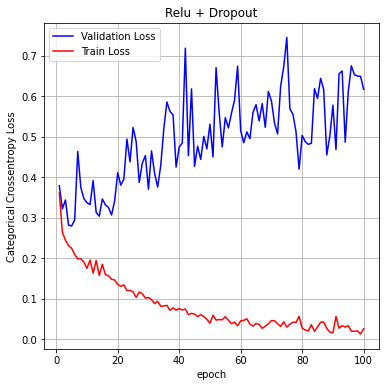

In [32]:
fig, ax = plt.subplots(1,1, figsize = (6, 6))
ax.set_xlabel('epoch')
ax.set_ylabel('Categorical Crossentropy Loss')
plt.title('Relu + Dropout')

# list of epoch numbers: epoch = 100
x = list(range(1,epochs+1))
vy = history_s.history['val_loss']
ty = history_s.history['loss']
plt_dynamic(x, vy, ty, ax)

In [0]:
def confusion_matrix(Y_true, Y_pred):
    Y_true = pd.Series([label[y] for y in np.argmax(Y_true, axis=1)])
    Y_pred = pd.Series([label[y] for y in np.argmax(Y_pred, axis=1)])
    c_m = pd.crosstab(Y_true, Y_pred, rownames=['True'], colnames=['Pred'])

    plt.figure(figsize= (6, 6))
    c_m = sns.heatmap(c_m, annot=True, cmap= sns.light_palette("blue"), fmt=".3f", xticklabels=label.values(), yticklabels= label.values())
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    
    return c_m

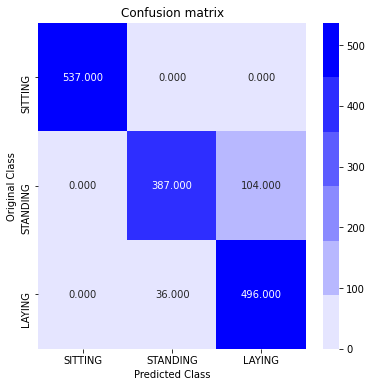

In [34]:
confusion_matrix(Y_test, model_s.predict(X_test))

In [35]:
import pickle
model_s.save('model_s')

INFO:tensorflow:Assets written to: model_s/assets


**Dynamic Activities**

In [0]:
# Labelling the classes in 'y' after OHE

label = {0:'WALKING', 1:'WALKING_UPSTAIRS', 2:'WALKING_DOWNSTAIRS'}

def load_y_Dynamic(subset):
  filename = f'/content/drive/My Drive/HumanActivityRecognition.zip (Unzipped Files)/HAR/UCI_HAR_Dataset/{subset}/y_{subset}.txt'
  y = pd.read_csv(filename, delim_whitespace=True, header=None)[0]
  y_subset = y<=3
  y = y[y_subset] 
  return pd.get_dummies(y).values,y_subset 

In [0]:
def load_data():
    """
    Obtain the dataset from multiple files.
    Returns: X_train, X_test, y_train, y_test
    """
    X_train, X_test = data_load('train'), data_load('test')
    y_train, y_train1 = load_y_Dynamic('train')
    y_test, y_test1 =  load_y_Dynamic('test')

    X_train = X_train[y_train1]

    X_test = X_test[y_test1]
    
    return X_train, X_test, y_train, y_test 

In [38]:
# Loading the train and test data
X_train, X_test, Y_train, Y_test = load_data()

print('X_train shape is: ',X_train.shape)
print('Y_train shape is: ',Y_train.shape)
print('X_test shape is: ',X_test.shape)
print('Y_test shape is: ',Y_test.shape)

X_train shape is:  (3285, 128, 9)
Y_train shape is:  (3285, 3)
X_test shape is:  (1387, 128, 9)
Y_test shape is:  (1387, 3)


In [39]:
input_dim = len(X_train[0][0])

print('Timesteps:', timesteps)
print('Input Dim:', input_dim)
print('No. of Train datapoints:', len(X_train))


Timesteps: 128
Input Dim: 9
No. of Train datapoints: 3285


In [40]:
model_d= Sequential()
model_d.add(Conv1D(filters= 64, kernel_size= 5, activation= 'relu', kernel_initializer= 'he_uniform', 
                  input_shape=(timesteps, input_dim)))
model_d.add(Conv1D(filters= 64, kernel_size= 5, activation= 'relu', kernel_initializer= 'he_uniform'))
model_d.add(MaxPooling1D(pool_size= 2, padding= 'same'))
model_d.add(Dropout(0.40))
model_d.add(Conv1D(filters= 32, kernel_size= 5, activation= 'relu', kernel_initializer= 'he_uniform'))
model_d.add(Conv1D(filters= 32, kernel_size= 5, activation= 'relu', kernel_initializer= 'he_uniform',))

# https://stackoverflow.com/a/49089027/10219869
# https://stackoverflow.com/a/58498450/10219869
model_d.add(MaxPooling1D(pool_size= 2, padding= 'same'))
model_d.add(BatchNormalization())
model_d.add(Dropout(0.40))
model_d.add(Flatten())
model_d.add(Dense(units= 100, activation= 'relu'))
model_d.add(BatchNormalization())           
model_d.add(Dropout(0.40))
model_d.add(Dense(units= 3, activation= 'softmax'))
model_d.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_5 (Conv1D)            (None, 124, 64)           2944      
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 120, 64)           20544     
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 60, 64)            0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 60, 64)            0         
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 56, 32)            10272     
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 52, 32)            5152      
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 26, 32)           

In [0]:
# Compiling the model 
model_d.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 

In [42]:
# Initializing parameters
epochs =100
batch_size =20
# Training the model 
history_d= model_d.fit(X_train, Y_train, batch_size=batch_size, validation_data=(X_test, Y_test), epochs=epochs) 

Epoch 1/100
165/165 [==============================] - 2s 10ms/step - loss: 1.1062 - accuracy: 0.5723 - val_loss: 0.9853 - val_accuracy: 0.6222
Epoch 2/100
165/165 [==============================] - 1s 8ms/step - loss: 0.2503 - accuracy: 0.9096 - val_loss: 0.7093 - val_accuracy: 0.7549
Epoch 3/100
165/165 [==============================] - 1s 9ms/step - loss: 0.0826 - accuracy: 0.9726 - val_loss: 0.3539 - val_accuracy: 0.8745
Epoch 4/100
165/165 [==============================] - 2s 9ms/step - loss: 0.0512 - accuracy: 0.9857 - val_loss: 0.1500 - val_accuracy: 0.9416
Epoch 5/100
165/165 [==============================] - 1s 9ms/step - loss: 0.0384 - accuracy: 0.9930 - val_loss: 0.0685 - val_accuracy: 0.9748
Epoch 6/100
165/165 [==============================] - 1s 8ms/step - loss: 0.0283 - accuracy: 0.9896 - val_loss: 0.0892 - val_accuracy: 0.9690
Epoch 7/100
165/165 [==============================] - 1s 9ms/step - loss: 0.0254 - accuracy: 0.9912 - val_loss: 0.0634 - val_accuracy: 0.973

In [43]:
model_d.evaluate(X_test, Y_test) 

44/44 [==============================] - 0s 5ms/step - loss: 0.0713 - accuracy: 0.9740


[0.07126739621162415, 0.974044680595398]

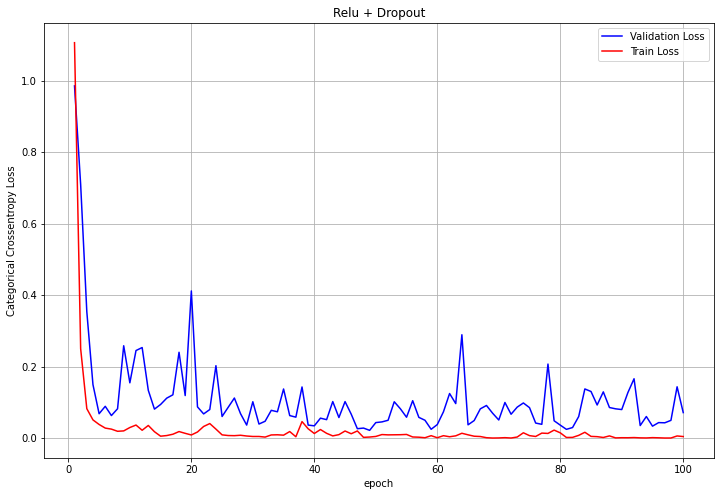

In [44]:
fig, ax = plt.subplots(1,1, figsize = (12, 8))
ax.set_xlabel('epoch')
ax.set_ylabel('Categorical Crossentropy Loss')
plt.title('Relu + Dropout')

# list of epoch numbers: epoch = 100
x = list(range(1,100+1))
vy = history_d.history['val_loss']
ty = history_d.history['loss']
plt_dynamic(x, vy, ty, ax)

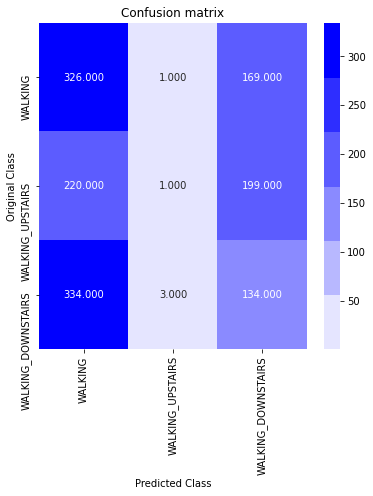

In [45]:
confusion_matrix(Y_test, model_s.predict(X_test))

In [46]:
model_d.save('model_d')

INFO:tensorflow:Assets written to: model_d/assets


In [47]:

print('X_train shape is: ',X_train_full.shape)
print('Y_train shape is: ',Y_train_full.shape)
print('X_test shape is: ',X_test_full.shape)
print('Y_test shape is: ',Y_test_full.shape)

X_train shape is:  (7352, 128, 9)
Y_train shape is:  (7352, 6)
X_test shape is:  (2947, 128, 9)
Y_test shape is:  (2947, 6)


In [48]:
timesteps = len(X_train_full[0])
input_dim = len(X_train_full[0][0])
print(timesteps)
print(input_dim)
print(len(X_train_full))

128
9
7352


In [0]:
predict_binary = model1.predict(X_test_full)
f_predict_binary = np.argmax(predict_binary, axis=1)

In [0]:
X_dynamic= X_test_full[f_predict_binary==0] 

In [74]:
X_dynamic[0][0]

array([-0.03167277, -0.08279653, -0.06853677, -0.6562038 ,  0.5171189 ,
       -0.2085947 ,  0.9455455 , -0.4315797 , -0.05446144])

In [0]:
predict_dynamic = model_d.predict(X_dynamic)
f_predict_dynamic = np.argmax(predict_dynamic,axis=1)

In [81]:
f_predict_dynamic+1

array([1, 1, 1, ..., 2, 2, 2])

In [0]:
def predict(X):
    ##predicting whether dynamic or static
    predict_binary = model1.predict(X)
    f_predict_binary = np.argmax(predict_binary, axis=1)
    
    #static data filter
    X_static = X[f_predict_binary==1]
    
    #dynamic data filter
    X_dynamic = X[f_predict_binary==0]
    
    #predicting static activities
    predict_static = model_s.predict(X_static)
    f_predict_static = np.argmax(predict_static,axis=1)
    
    #adding 3 because need to get inital prediction lable as output 
    f_predict_static = f_predict_static + 3
    
    #predicting dynamic activites
    predict_dynamic = model_d.predict(X_dynamic)
    f_predict_dynamic = np.argmax(predict_dynamic,axis=1)
    
    # lable of dynamic activites is given as fellowes {0: 'WALKING',1: 'WALKING_UPSTAIRS',2: 'WALKING_DOWNSTAIRS',3: 'SITTING',4: 'STANDING',5: 'LAYING'},so No need add any prediction lable as output.
    f_predict_dynamic = f_predict_dynamic
    
    ##appending final output to one list in the same sequence of input data
    i,j = 0,0
    final_predict = []
    
    for q_p in f_predict_binary:
        if q_p == 1:
            final_predict.append(f_predict_static[i])
            i = i + 1
        else:
            final_predict.append(f_predict_dynamic[j])
            j = j + 1
    
    return final_predict

In [93]:
from sklearn.metrics import accuracy_score

train_pred = predict(X_train_full)
test_pred = predict(X_test_full)

print('Accuracy of train data',accuracy_score(np.argmax(Y_train_full,axis=1),train_pred))
print('Accuracy of validation data',accuracy_score(np.argmax(Y_test_full,axis=1),test_pred))

Accuracy of train data 0.9949673558215452
Accuracy of validation data 0.9382422802850356


Text(0.5, 1.0, 'Confusion matrix')

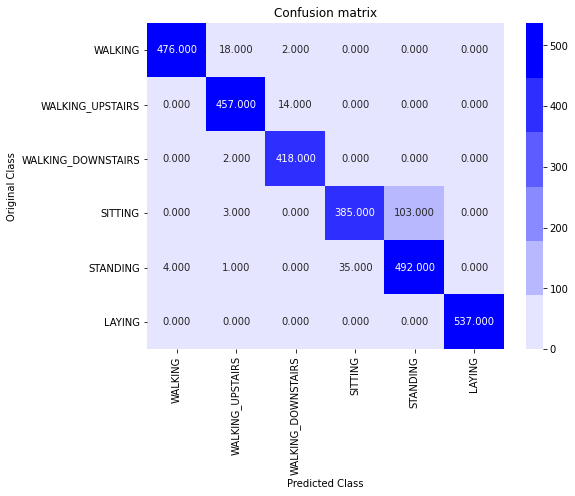

In [95]:
ACTIVITIES = {0: 'WALKING',1: 'WALKING_UPSTAIRS',2: 'WALKING_DOWNSTAIRS',3: 'SITTING',4: 'STANDING',5: 'LAYING'}
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(np.argmax(Y_test_full,axis=1), test_pred)
plt.figure(figsize= (8, 6))
sns.heatmap(cm, annot=True, cmap= sns.light_palette("blue"), fmt=".3f", xticklabels=ACTIVITIES.values(), 
                      yticklabels= ACTIVITIES.values())
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.title("Confusion matrix")

In [96]:
from prettytable import PrettyTable
x = PrettyTable()

x.field_names = ['Rank', 'Model', "Test Accuracy"]

x.add_row([1, "Divide + Conquer Model", "0.9949673558215452"])
x.add_row([2, "32 LSTM Base Model", "0.9382422802850356"])

print(x)

+------+------------------------+--------------------+
| Rank |         Model          |   Test Accuracy    |
+------+------------------------+--------------------+
|  1   | Divide + Conquer Model | 0.9949673558215452 |
|  2   |   32 LSTM Base Model   | 0.9382422802850356 |
+------+------------------------+--------------------+
